# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [36]:
import numpy as np

### Simulation du lancé de dé

In [37]:
def Roll():
    return int(np.random.choice(range(1,7),1))
# on transforme l'array avec la fonction int()sous forme d'entier

In [38]:
for i in range(20):
    print(Roll())


2
2
6
6
3
2
4
4
6
1
2
6
5
1
4
6
3
5
4
2


### Compléter le code et commenter

In [39]:
A=0     # position
NA=0  # la valeur de dé aprés le lancement 
N=10 # la position de la cible
c=0 # compteur
while (A<N) :
    NA=Roll()
    if NA==6 and A==0:
        A=1
        c=c+1
        print(NA,A,c)
        
    elif A>0 and NA+A<N:
        A=A+NA
        c=c+1
        print(NA,A,c)
    elif NA+A==N:
        c=c+1
        A=A+NA
        print(NA,A,c)
        break
    else:
        c=c+1
        print(NA,A,c)
        
    

5 0 1
4 0 2
3 0 3
1 0 4
4 0 5
2 0 6
2 0 7
3 0 8
3 0 9
4 0 10
1 0 11
5 0 12
3 0 13
1 0 14
4 0 15
1 0 16
6 1 17
6 7 18
2 9 19
3 9 20
6 9 21
2 9 22
5 9 23
2 9 24
6 9 25
6 9 26
5 9 27
5 9 28
2 9 29
2 9 30
1 10 31


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [41]:
def sim(N):
    """"Simulation d'un jeux de ludo simple avec 
    Une grille de longueur N donné
    Le principe est de déterminer le nombre de coup nécessaire
    pour sortir du prison et atteindre la cible """
    A=0
    NA=0
    c=0
    while (A<N) :
        NA=Roll()
        if NA==6 and A==0:
            A=1
            c=c+1
        elif A>0 and NA+A<N:
            A=A+NA
            c=c+1
        elif NA+A==N:
            c=c+1
            A=A+NA
            break
        else:
            c=c+1
            
    return c
    

In [43]:
sim(50)

42

### Simulation de $10^5$  scénario 

In [71]:
E=10000
N=10
L=[]
for i in range(E):
    
    L.append(sim(N))
def moyenne(L):
    tot=0
    for u in L:
        tot=tot+u
    return tot/len(L)

moyenne (L)


13.3933

In [72]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [73]:
ESP=Freq.sum()/10**5

In [74]:
x=list(range(10,20))

In [75]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [76]:
import matplotlib.pyplot as plt

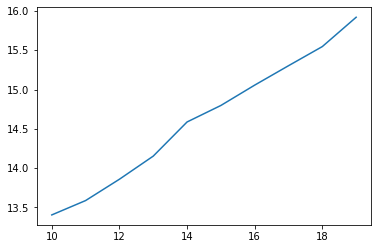

In [77]:
plt.plot(x,y)

<h1>Remarque</h1>
<p>on remarque que la nuage des points forme un droite alors E(X(n))=a*n+b
trouverr a et b ?</p>

In [78]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [81]:
slope

0.28199709090909086

In [82]:
intercept


10.533546181818185

<h1>Remarque</h1>
<p>E(X(n))=0.282*n+10.534</p>
<h2>Exemple:</h2>
<p>n=55 --> E(X(n))=0.282*55+10.534</p>